<a href="https://colab.research.google.com/github/Gweneal3/DeepLearning_YT/blob/master/CIFAR%20-%2010%20Object%20Recognition%20using%20ResNet50/CIFAR_10_Object_Recognition_using_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# dataset API
!kaggle competitions download -c cifar-10

100% 713M/715M [00:33<00:00, 24.9MB/s]
100% 715M/715M [00:33<00:00, 22.7MB/s]


In [5]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [5]:
from zipfile import ZipFile
dataset = './cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Extracted')

Extracted


In [7]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [6]:
!pip install py7zr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.2/357.2 KB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.0/384.0 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.0/93.0 KB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 KB 20.3 MB/s eta 0:00:00


In [7]:
import py7zr

archive = py7zr.SevenZipFile('./train.7z',mode='r')
archive.extractall()
archive.close()

In [10]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Import Dependencies

In [8]:
import numpy as np
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [12]:
filenames = os.listdir("/content/train")

In [13]:
type(filenames)

list

In [14]:
len(filenames)

50000

In [15]:
print(filenames[0:5])
print(filenames[-5:])

['3040.png', '12281.png', '37606.png', '1116.png', '5636.png']
['28032.png', '32711.png', '28935.png', '21730.png', '6304.png']


Label Processing

In [9]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [17]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [18]:
labels_df.shape

(50000, 2)

In [19]:
labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [10]:
labels_dictionary = {
    'airplane':0,
    'automobile':1,
    'bird':2,
    'cat':3,
    'deer':4,
    'dog':5,
    'frog':6,
    'horse':7,
    'ship':8,
    'truck':9
}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [21]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


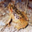

In [22]:
# display sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/7796.png')
cv2_imshow(img)

In [11]:
id_list = list(labels_df['id'])

Image Processing

In [12]:
# convert image to np arrays
train_data_folder = './train/'
data = []

for id in id_list:
  image = Image.open(train_data_folder+str(id)+'.png')
  image = np.array(image)
  data.append(image)

In [25]:
type(data)

list

In [26]:
len(data)

50000

In [27]:
type(data[0])

numpy.ndarray

In [28]:
data[0].shape

(32, 32, 3)

In [29]:
data[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [13]:
# convert image list and labels list to numpy arrays
X = np.array(data)
Y = np.array(labels)

In [31]:
type(X)

numpy.ndarray

In [32]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


Train Test Split

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


Scale data

In [15]:
X_train = X_train/255
X_test = X_test/255

Build NN

In [16]:
import tensorflow as tf
from tensorflow import keras

In [37]:
num_of_classes = 10
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax'),
])

In [38]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

In [39]:
# training NN
model.fit(X_train, Y_train, validation_split = 0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 8s 3ms/step - loss: 1.9614 - acc: 0.2816 - val_loss: 1.8423 - val_acc: 0.3277
Epoch 2/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8422 - acc: 0.3379 - val_loss: 1.7751 - val_acc: 0.3528
Epoch 3/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8099 - acc: 0.3494 - val_loss: 1.7788 - val_acc: 0.3627
Epoch 4/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7885 - acc: 0.3579 - val_loss: 1.7805 - val_acc: 0.3537
Epoch 5/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7775 - acc: 0.3643 - val_loss: 1.7536 - val_acc: 0.3700
Epoch 6/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7639 - acc: 0.3693 - val_loss: 1.7799 - val_acc: 0.3582
Epoch 7/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7507 - acc: 0.3717 - val_loss: 1.7301 - val_acc: 0.3755
Epoch 8/10
1125/1125 [==============================] - 3s 3ms

ResNet50

In [17]:
from tensorflow.keras import Sequential, models, layers, optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.applications.resnet50 import ResNet50

In [18]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3)) #include_top=False not include output layer
convolutional_base.summary()

94765736/94765736 [==============================] - 5s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [20]:
num_of_classes = 10
model = models.Sequential()
model.add(layers.UpSampling2D((2,2))) # size_ori =32 -> *2 =64
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2))) # 3 times, become 256
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5)) # prevent overfit
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [21]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [25]:
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
1125/1125 [==============================] - 438s 389ms/step - loss: 0.9314 - acc: 0.7754 - val_loss: 10.1203 - val_acc: 0.7082
Epoch 2/5
1125/1125 [==============================] - 441s 392ms/step - loss: 0.8205 - acc: 0.7997 - val_loss: 7.4891 - val_acc: 0.7780
Epoch 3/5
1125/1125 [==============================] - 441s 392ms/step - loss: 0.7598 - acc: 0.8173 - val_loss: 5.2094 - val_acc: 0.8160
Epoch 4/5
1125/1125 [==============================] - 441s 392ms/step - loss: 0.6475 - acc: 0.8354 - val_loss: 5.1822 - val_acc: 0.8345
Epoch 5/5
1125/1125 [==============================] - 440s 391ms/step - loss: 0.5557 - acc: 0.8588 - val_loss: 1.5031 - val_acc: 0.9055


In [26]:
loss, accuracy = model.evaluate(X_test, Y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 36s 114ms/step - loss: 1.6758 - acc: 0.8985
Test Accuracy = 0.8985000252723694


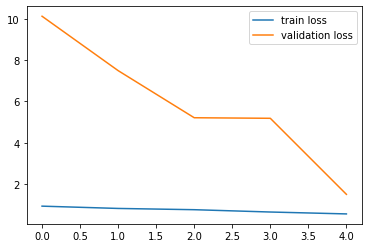

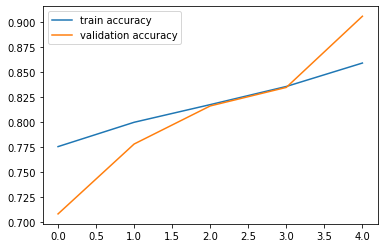

In [27]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()